In [30]:
import numpy as np
import pandas as pd
import pickle
from datetime import datetime, date, timedelta
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics

In [31]:
data = pd.read_csv('train_sample.csv')

Data anaysis: data is clean enough and no missing values (for this data set). For each categorical variable, the number of class is 100+, and some classes is minority (1 count, for this data set, for bigger one, this may not happen)

In [32]:
def convert_str2time(x):
    return time.strptime(x, "%Y-%m-%d %H:%M:%S")

In [33]:
# some preparation
# this dictionary is for convenience when using attrbutes in structrue_time objects 
stru_time = {'year': 0, 'mon': 1, 'day': 2, 'hour': 3, 'min': 4, 'wday': 6, 'yday': 7 } 
# categorical variables used for the click_time attribute
categ_time = ['hour', 'wday']
# categorical variables
categ = ['app', 'device', 'os', 'channel']


In [34]:
# def eda_is_attributed(data):
#     ff = data.drop(['attributed_time', 'ip', 'channel', 'app', 'os', 'device'], axis=1)
#     ff['time_stru'] = ff['click_time'].apply(convert_str2time)
#     for col in categ_time:
#         ff[col] = ff['time_stru'].apply(lambda x: x[stru_time[col]])
#     ff = ff.drop(['time_stru', 'click_time'], axis=1)
#     c = ff.groupby(['wday', 'hour', 'is_attributed'])['is_attributed'].count()
#     wdays = c.index.get_level_values(0).unique()
#     for i in wdays:
#         hours = c[i].index.get_level_values(0).unique()
#         for j in hours:
#             c[i][j].plot(kind='bar')
#             plt.ylabel('numbers of clicks')
#             plt.xlabel('download or not')
#             plt.title('total number of clicks for download or not in' + str(j) +'th hour on ' + str(i+1) + 'th weekday')
#             for k, v in enumerate(c[i][j]):
#                 plt.text(k-0.05, v+3, str(v))
#             plt.show()

In [35]:
# eda_is_attributed(data)

In [36]:
# def eda_is_attributed_line(data):
#     ff = data.drop(['attributed_time', 'ip', 'channel', 'app', 'os', 'device'], axis=1)
#     ff['time_stru'] = ff['click_time'].apply(convert_str2time)
#     for col in categ_time:
#         ff[col] = ff['time_stru'].apply(lambda x: x[stru_time[col]])
#     ff = ff.drop(['time_stru', 'click_time'], axis=1)
#     c = ff.groupby(['wday', 'hour', 'is_attributed'])['is_attributed'].count()
#     wdays = c.index.get_level_values(0).unique()
#     rates = []
#     plt.figure(figsize=(10,10))
#     for i in wdays:
#         hours = c[i].index.get_level_values(0).unique()
#         for j in hours:
#             if len(c[i][j]) == 1:
#                 rates.append(0)
#             else:
#                 rates.append(c[i][j][1]/c[i][j][0])
#     plt.plot(rates)
#     plt.ylabel('rates of attribution')
#     plt.title('hourly rates of attribution')
#     plt.show()

In [37]:
# eda_is_attributed_line(data)

In [38]:
def eda_is_attributed_line_hourly(data):
    ff = data.drop(['attributed_time', 'ip', 'channel', 'app', 'os', 'device'], axis=1)
    ff['time_stru'] = ff['click_time'].apply(convert_str2time)
    for col in categ_time:
        ff[col] = ff['time_stru'].apply(lambda x: x[stru_time[col]])
    ff = ff.drop(['time_stru', 'click_time'], axis=1)
    c = ff.groupby(['hour', 'is_attributed'])['is_attributed'].count()
    holder = np.zeros(24)
    plt.figure(figsize=(10,10))
    for i in range(24):
        if len(c[i]) > 1:
            holder[i] = c[i][1]/c[i][0]
    plt.plot(np.arange(24)+1,holder)
    plt.xlabel('th hour')
    plt.ylabel('rates of attribution')
    plt.title('hourly rates of attribution')
    plt.show()

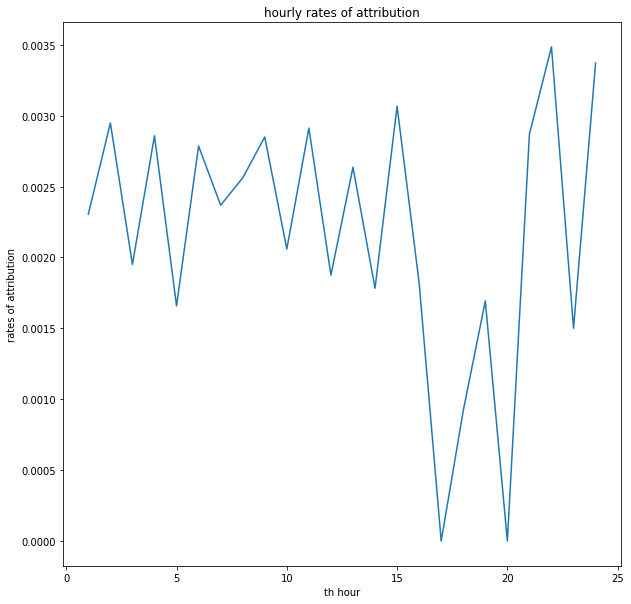

In [39]:
eda_is_attributed_line_hourly(data)

In [11]:
# def eda_category_line_hourly(data,category,num_to_show = 10):
#     ff = data.drop(['attributed_time'], axis=1)
#     ff['time_stru'] = ff['click_time'].apply(convert_str2time)
#     for col in categ_time:
#         ff[col] = ff['time_stru'].apply(lambda x: x[stru_time[col]])
#     ff = ff.drop(['time_stru', 'click_time'], axis=1)
#     for i in range(24):
#         c = ff.groupby(['hour', category])[category].count()[i].sort_values(ascending=False)
#         c[:num_to_show].plot(kind='bar')
#         plt.title('Most frequent ' + category + ' in ' + str(i) + 'th hour')
#         plt.show()
#         c[-num_to_show:].plot(kind='bar')
#         plt.title('least frequent ' + category + 'in' + str(i) + 'th hour')
#         plt.show()

In [12]:
# eda_category_line_hourly(data,'app')

In [23]:
category = 'app'
l = ['attributed_time','click_time','channel','ip','device','os', 'app']
l.remove(category)
ff = data.drop(l, axis=1)

In [24]:
def eda_category_hist(data,category,num_to_show = 10):
    l = ['attributed_time','click_time','channel','ip','device','os', 'app']
    l.remove(category)
    ff = data.drop(l, axis=1)
    c = ff.groupby([category]).count().sort_values(by = 'is_attributed', ascending=False)
    c[:num_to_show].plot(kind='bar', legend=False)
    plt.title('Most frequent ' + category )
    plt.show()
    c[-num_to_show:].plot(kind='bar', legend=False)
    plt.title('least frequent ' + category)
    plt.show()

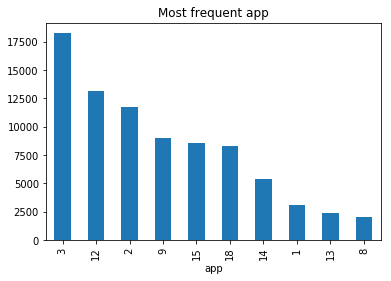

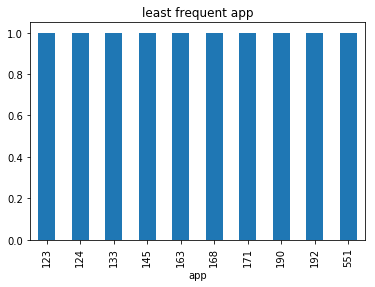

In [25]:
eda_category_hist(data,'app')

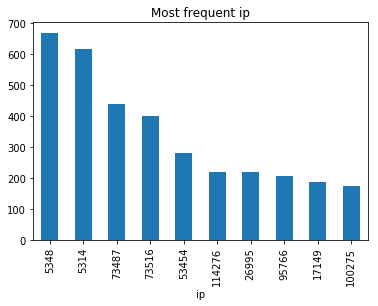

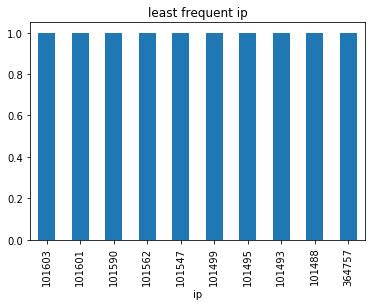

In [26]:
eda_category_hist(data,'ip')

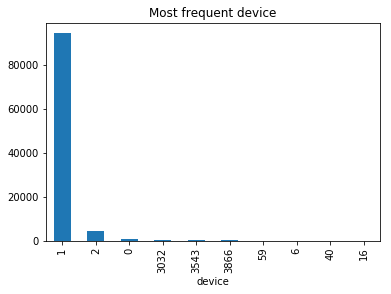

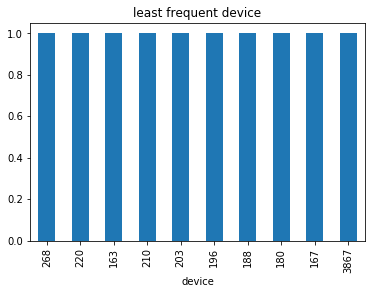

In [27]:
eda_category_hist(data,'device')

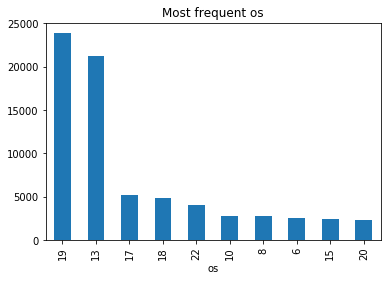

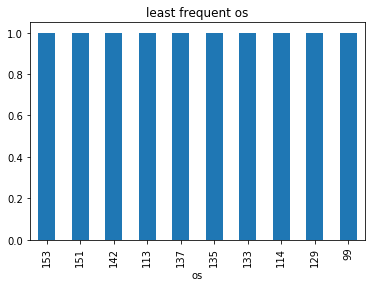

In [28]:
eda_category_hist(data,'os')

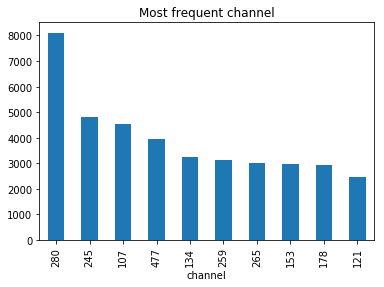

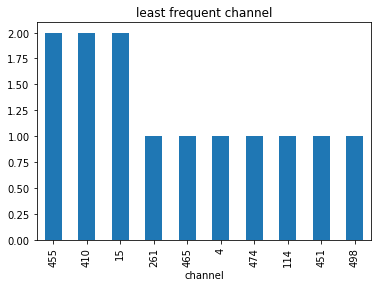

In [29]:
eda_category_hist(data,'channel')

In [19]:
# def eda_num_of_class_in_col(data, col, num_to_show = 10):
#     plt.figure(figsize = (50,100))
#     for i in range(24):
#         plt.subplot(24, 1, i+1)
#         c = data.groupby(['hour', col])[col].count()[i].sort_values(ascending=False)
#         c[:num_to_show].plot(kind='bar')
#     plt.show()

In [20]:
# eda_num_of_class_in_col(f, 'app')

In [21]:
#PLOT CONFUSION MATRIX
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [22]:
y = data['is_attributed']
f = data.drop(['attributed_time', 'is_attributed'], axis=1)

In [23]:
# deal with click_time
f['time_stru'] = f['click_time'].apply(convert_str2time)
f.sort_values(by = 'time_stru')
x = f[['ip']]
for col in categ:
    dm_df = pd.get_dummies(f[col], prefix=col, drop_first=True)
    x = pd.concat((x, dm_df), axis = 1)
    
for col in categ_time:
    f[col] = f['time_stru'].apply(lambda x: x[stru_time[col]])
    dm_df = pd.get_dummies(f[col], prefix=col, drop_first=True)
    x = pd.concat((x, dm_df), axis = 1)

In [24]:
#split train and test
x = x.drop(['ip'], 1)
n_ins = len(x)
rate_tr = 0.4
n_tr = int(n_ins*rate_tr)
x_tr, x_tr2, x_ts = x.iloc[:n_tr], x.iloc[n_tr:2*n_tr], x.iloc[2*n_tr:]
y_tr, y_tr2, y_ts = y.iloc[:n_tr], y.iloc[n_tr:2*n_tr], y.iloc[2*n_tr:]

0.785821350039
Confusion matrix, without normalization
[[19757   205]
 [   16    22]]


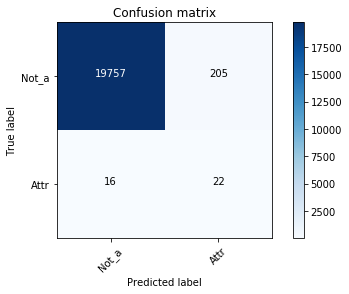

In [25]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_split = 30, class_weight='balanced')
dt.fit(x_tr, y_tr)
predC_dt = dt.predict(x_ts)
pred_dt = dt.predict_proba(x_ts)
fpr, tpr, thresholds = metrics.roc_curve(y_ts, pred_dt[:,1])
auc_dt = metrics.auc(fpr, tpr)
print(auc_dt)
cnf_matrix = confusion_matrix(y_ts, predC_dt)
plot_confusion_matrix(cnf_matrix, classes=['Not_a', 'Attr'] , normalize=False, title='Confusion matrix')

0.773434657428
Confusion matrix, without normalization
[[19779   183]
 [   17    21]]


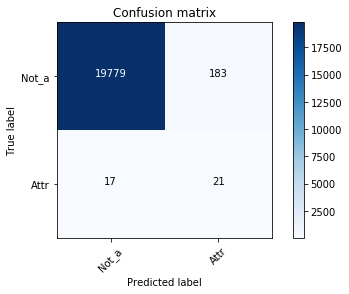

In [26]:
dt = DecisionTreeClassifier(min_samples_split = 30, class_weight='balanced')
dt.fit(x_tr2, y_tr2)
predC_dt = dt.predict(x_ts)
pred_dt = dt.predict_proba(x_ts)
fpr, tpr, thresholds = metrics.roc_curve(y_ts, pred_dt[:,1])
auc_dt = metrics.auc(fpr, tpr)
print(auc_dt)
cnf_matrix = confusion_matrix(y_ts, predC_dt)
plot_confusion_matrix(cnf_matrix, classes=['Not_a', 'Attr'] , normalize=False, title='Confusion matrix')

0.953715348636


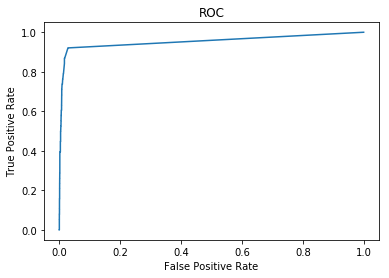

Confusion matrix, without normalization
[[19949    13]
 [   32     6]]


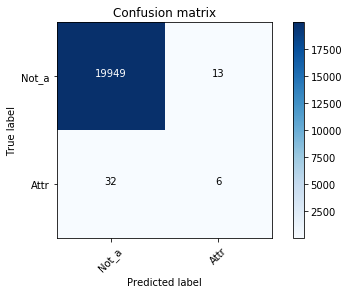

In [27]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(x_tr, y_tr)
predC_rf = rf.predict(x_ts)
pred_rf = rf.predict_proba(x_ts)
fpr, tpr, thresholds = metrics.roc_curve(y_ts, pred_rf[:,1])
auc_lr = metrics.auc(fpr, tpr)
print(auc_lr)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
cnf_matrix = confusion_matrix(y_ts, predC_rf)
plot_confusion_matrix(cnf_matrix, classes=['Not_a', 'Attr'] , normalize=False, title='Confusion matrix')

In [40]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(x_tr2, y_tr2)
predC_rf = rf.predict(x_ts)
pred_rf = rf.predict_proba(x_ts)
fpr, tpr, thresholds = metrics.roc_curve(y_ts, pred_rf[:,1])
auc_lr = metrics.auc(fpr, tpr)
print(auc_lr)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
cnf_matrix = confusion_matrix(y_ts, predC_rf)
plot_confusion_matrix(cnf_matrix, classes=['Not_a', 'Attr'] , normalize=False, title='Confusion matrix')

NameError: name 'RandomForestClassifier' is not defined